In [55]:
import numpy as np 
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,random_split,Dataset,Subset
import torchvision.transforms as transforms
import torchvision.models as models
from d2l import torch as d2l
import matplotlib.pyplot as plt

In [56]:
# train = pd.read_csv('C:/Users/MJ/Desktop/FunctionApproximation/train.csv')
# test =pd.read_csv('C:/Users/MJ/Desktop/FunctionApproximation/test.csv')
# val_size = int(0.2 * len(train))
# train_size=len(train)-val_size
# train, valid = random_split(train,[train_size, val_size])

In [57]:
cuda = True if torch.cuda.is_available() else False

In [58]:
train=pd.read_csv("C:/Users/MJ/Desktop/FunctionApproximation/train.csv")
test=pd.read_csv("C:/Users/MJ/Desktop/FunctionApproximation/test.csv")
train_x=train.drop(['id','y'],axis=1).values
train_y=train['y'].values


In [59]:
class FADataset(Dataset):
    def __init__(self, x,y):
        super().__init__()
        self.x=torch.tensor(x,dtype=torch.float32)
        self.y=torch.tensor(y,dtype=torch.float32)
        self.flag= [False] * len(self.x)
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        data=self.x[idx]
        target=self.y[idx]
        return data,target,idx

    def update_loss_value(self, idx):
        self.flag[idx] = True
        

In [60]:
batch_size=80
para={
    "shuffle":True,
    "batch_size":batch_size
}
dataset=FADataset(train_x,train_y)
trainset, validset = random_split(dataset, [0.8, 0.2])
train_dl= DataLoader(trainset, **para)
valid_dl= DataLoader(validset,**para)
test_dl= DataLoader(test, **para)


In [61]:
class MLP(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2,num_hidden3,num_hidden4, output_dim):
        super().__init__()
        self.model=nn.Sequential(nn.Linear(input_dim,num_hidden1),
                                nn.Linear(num_hidden1,num_hidden2),
                                nn.ReLU(True),
                                nn.Linear(num_hidden2,num_hidden3),
                                nn.ReLU(True),
                                nn.Linear(num_hidden3,num_hidden4),
                                nn.Linear(num_hidden4,output_dim)
                                )
    def forward(self, x):
        return self.model(x)


In [78]:
model=[]
optimizer=[]
for i in range(3):
    model.append(MLP(input_dim=2, num_hidden1=80,num_hidden2=128,num_hidden3=256,num_hidden4=128, output_dim=1))
    optimizer.append(torch.optim.Adam(model[i].parameters(), lr=0.001))
criterion = nn.MSELoss()



In [98]:
num_epochs = 30
losses=[]
size = len(train_dl)
model[0].train()
for epoch in range(num_epochs):
    for batch,(data, target,idx) in enumerate(train_dl):
        outputs = model[0](data)
        loss = criterion(outputs, target)
        optimizer[0].zero_grad()
        loss.backward()
        optimizer[0].step()
        if batch % 80 == 0: #每通過batch個數量的資料就輸出一次損失的值
            print(f"loss: {loss.item():>7f} ")
            losses.append(loss.item())


loss: 0.141618 
loss: 0.143492 
loss: 0.135661 
loss: 0.126907 
loss: 0.157867 
loss: 0.171311 
loss: 0.130562 
loss: 0.143332 
loss: 0.163566 
loss: 0.143830 
loss: 0.123704 
loss: 0.189558 
loss: 0.137575 
loss: 0.147060 
loss: 0.159275 
loss: 0.153175 
loss: 0.126791 
loss: 0.141535 
loss: 0.165360 
loss: 0.149838 
loss: 0.147054 
loss: 0.131318 
loss: 0.159196 
loss: 0.143013 
loss: 0.132353 
loss: 0.158934 
loss: 0.145027 
loss: 0.152607 
loss: 0.125840 
loss: 0.142664 


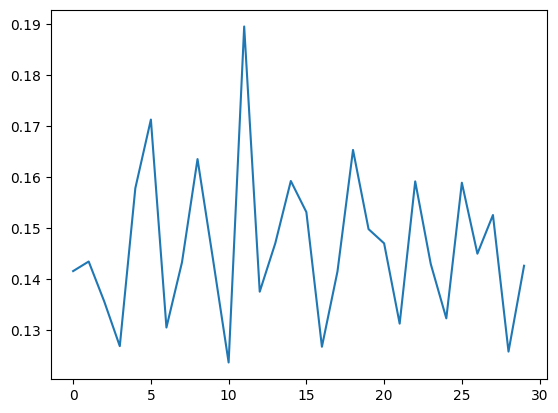

In [99]:
plt.plot(losses)

In [100]:
model[0].eval()

for batch,(data, target,idx) in enumerate(valid_dl):
    outputs = model[0](data)
    loss = criterion(outputs, target)
print(f"loss: {loss.item():>7f} ")

loss: 0.136917 


In [101]:
model[0].eval()
indexF=[]
indexT=[]
for i in range(len(trainset)):
    outputs = model[0](trainset.dataset.x[i])
    loss = criterion(outputs,trainset.dataset.y[i].reshape(1))
    if(loss>0.17):
        indexF.append(i)
    else:
        indexT.append(i)

In [102]:
Fdataset=torch.utils.data.Subset(trainset, indexF)
Tdataset=torch.utils.data.Subset(trainset, indexT)
Fdl=DataLoader(Fdataset,**para)
Tdl=DataLoader(Tdataset,**para)


In [103]:
num_epochs = 30
size = len(train_dl)
model[1].train()
for epoch in range(num_epochs):
    for batch,(data, target,idx) in enumerate(Fdl):
        outputs = model[1](data)
        loss = criterion(outputs, target.reshape(-1))
        optimizer[1].zero_grad()
        loss.backward()
        optimizer[1].step()
        if batch % 80 == 0: #每通過batch個數量的資料就輸出一次損失的值
            print(f"loss: {loss.item():>7f} ")
            losses.append(loss.item())

loss: 0.138779 
loss: 0.132607 
loss: 0.161179 


c:\Users\MJ\anaconda3\envs\MJ\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


loss: 0.177269 
loss: 0.136110 
loss: 0.112405 
loss: 0.113173 
loss: 0.135694 
loss: 0.132358 
loss: 0.131532 
loss: 0.153954 
loss: 0.170631 
loss: 0.170795 
loss: 0.162848 
loss: 0.152247 
loss: 0.150450 
loss: 0.119084 
loss: 0.164473 
loss: 0.159244 
loss: 0.159593 
loss: 0.168806 
loss: 0.129819 
loss: 0.122657 
loss: 0.150575 
loss: 0.139019 
loss: 0.132401 
loss: 0.138456 
loss: 0.156608 
loss: 0.138007 
loss: 0.137036 


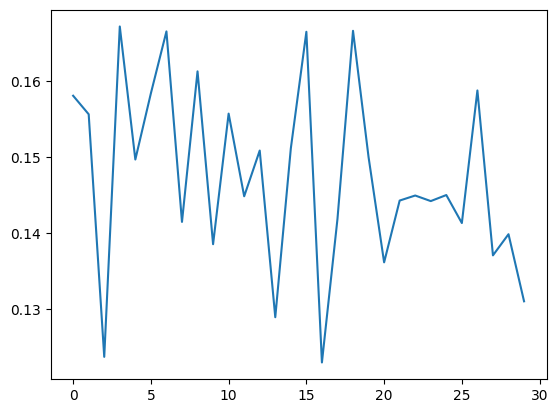

In [97]:
plt.plot(losses)

In [86]:
model[1].eval()

for batch,(data, target,idx) in enumerate(valid_dl):
    outputs = model[1](data)
    loss = criterion(outputs, target)
print(f"loss: {loss.item():>7f} ")

loss: 0.127528 
